In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
survey_raw = pd.read_csv('/Users/kimminsoo/Desktop/pythonbasic/untitled folder/survey_results_public.csv', index_col='ResponseId')
schema_raw = pd.read_csv('/Users/kimminsoo/Desktop/pythonbasic/untitled folder/survey_results_schema.csv', index_col='qname')['question']

In [27]:
survey_raw.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [28]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [80]:
selected_columns =[
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

survey_df = survey_raw[selected_columns].copy()
survey_df['DevType'].unique()

array([nan,
       'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', ...,
       'Data scientist or machine learning specialist;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;Blockchain',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, mobile;Educator;Developer, embedded applications or devices',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scie

In [222]:
survey_df.where(~(survey_df["Gender"].str.contains(';', na=False)), np.nan, inplace=True)

In [223]:

def split_multicolumn(col_series):
    # 반환할 DatFrame이자 최초의 col_seires도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=['DevType'])
    options = []

    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

split_multicolumn(survey_df["DevType"])

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [224]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]

dev_type_df = split_multicolumn(survey_df['DevType'])
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [214]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df

dev_type_df = split_multicolumn(survey_df['DevType'])
dev_type_df

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [225]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [226]:
devtype_percentage = (dev_type_totals / dev_type_totals.sum()) * 100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

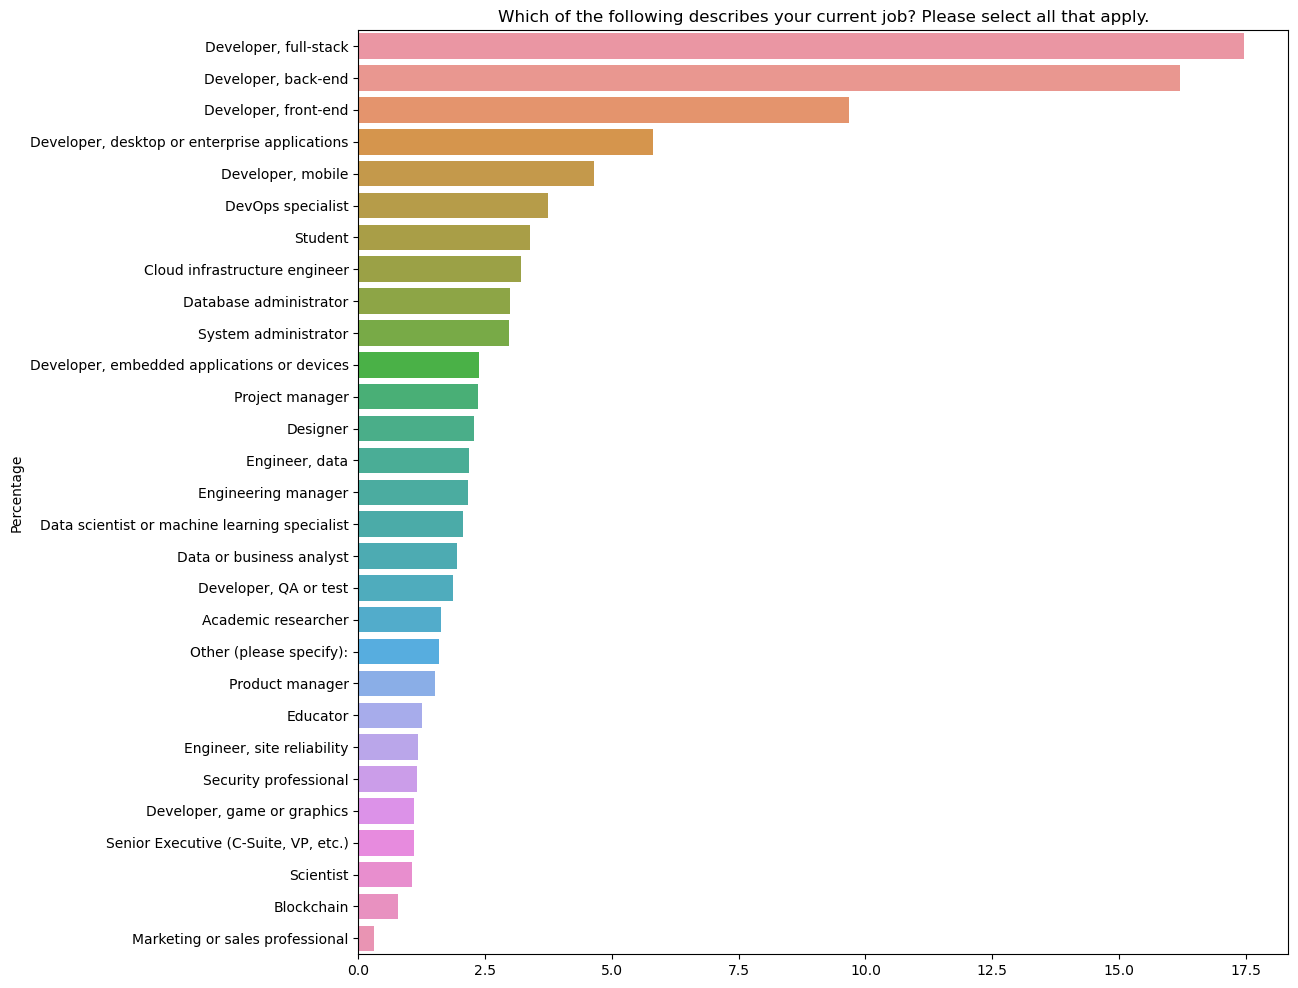

In [227]:
plt.figure(figsize=(12,12))
plt.title(schema_raw['DevType'])
plt.ylabel('Percentage')
sns.barplot(x=devtype_percentage, y=devtype_percentage.index)
plt.show()

In [242]:
split_multicolumn(survey_df['LanguageHaveWorkedWith'])

language_hw_total = split_multicolumn(survey_df["LanguageHaveWorkedWith"]).sum().sort_values(ascending=False)

language_hw_percentage = (language_hw_total / language_hw_total.sum()) * 100
language_hw_percentage


JavaScript     12.656210
HTML/CSS       10.658759
SQL             9.576199
Python          9.298125
TypeScript      6.737094
Java            6.441124
Bash/Shell      5.604700
C#              5.416106
C++             4.360802
PHP             4.036199
C               3.718479
PowerShell      2.331690
Go              2.153833
Rust            1.784903
Kotlin          1.766457
Dart            1.264272
Ruby            1.163505
Assembly        1.045117
Swift           0.948204
R               0.897820
VBA             0.866434
MATLAB          0.789895
Lua             0.771448
Groovy          0.639294
Delphi          0.629658
Scala           0.495302
Objective-C     0.459235
Perl            0.443541
Haskell         0.421516
Elixir          0.412155
Julia           0.291564
Clojure         0.286884
Solidity        0.277523
LISP            0.247513
F#              0.196304
Fortran         0.173727
Erlang          0.170423
APL             0.130777
COBOL           0.122518
SAS             0.114809


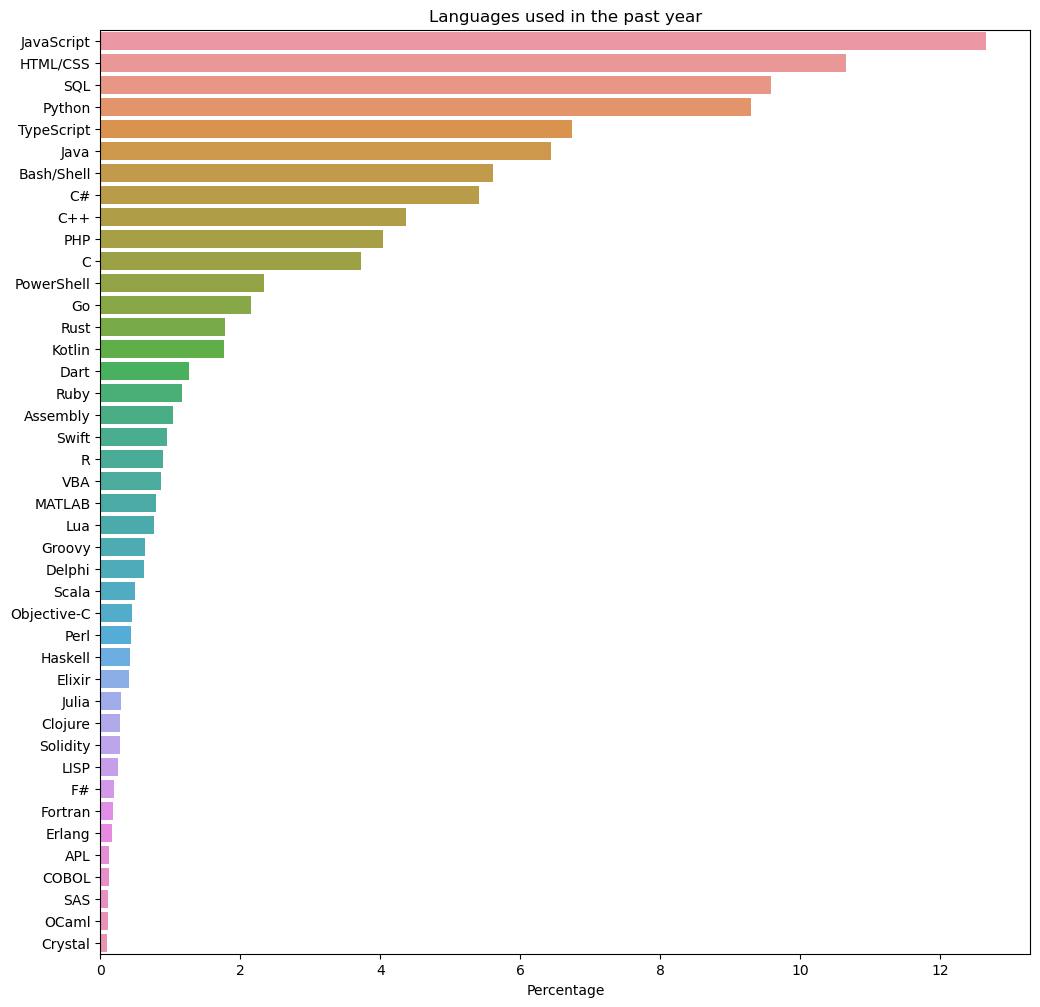

In [240]:
plt.figure(figsize=(12,12))
plt.title('Languages used in the past year')
plt.xlabel('Percentage')
sns.barplot(x=language_hw_percentage, y=language_hw_percentage.index)
plt.show()

##[결과]
웹개발 : Javascript 및 HTML/CSS
SQL : 관계형 데이터베이스 
Python
TypeScirpt

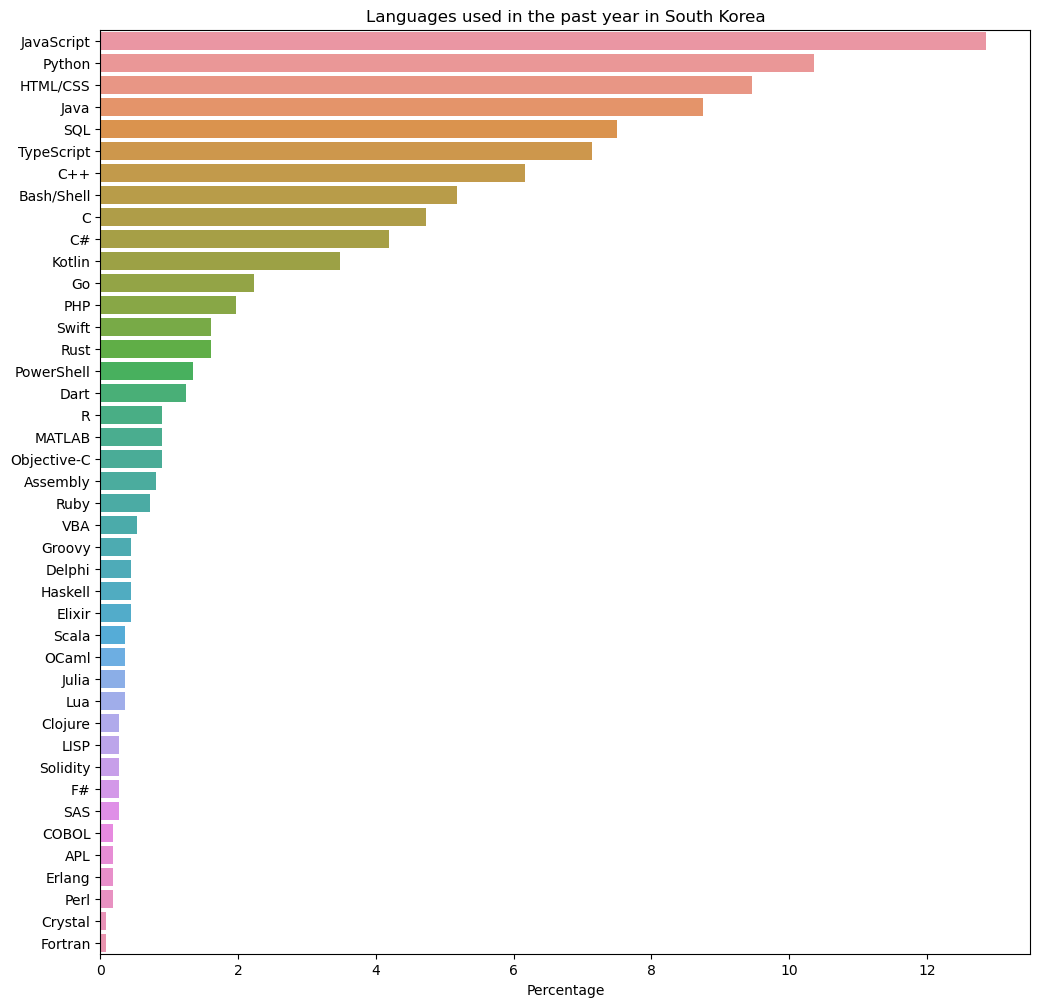

In [273]:
survey_kor = survey_df[(survey_df.Country == 'South Korea') | (survey_df.Country == 'Repulic of Korea')]
survey_kor

split_multicolumn(survey_kor['LanguageHaveWorkedWith'])
survey_kor_totals = split_multicolumn(survey_kor['LanguageHaveWorkedWith']).sum().sort_values(ascending=False)
survey_kor_totals

survey_kor_percentage = (survey_kor_totals / survey_kor_totals.sum()) * 100
survey_kor_percentage

plt.figure(figsize=(12,12))
plt.title('Languages used in the past year in South Korea')
plt.xlabel('Percentage')
sns.barplot(x=survey_kor_percentage, y=survey_kor_percentage.index)
plt.show()

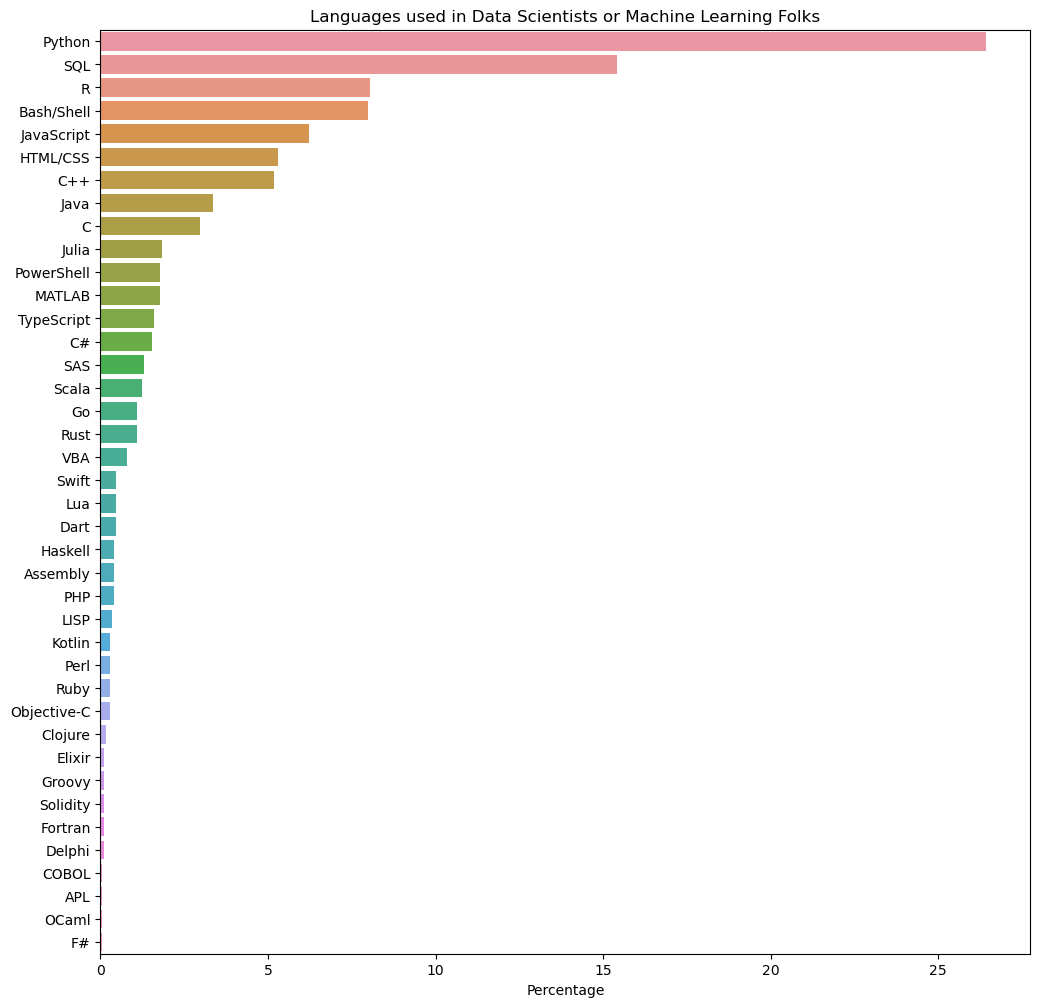

In [303]:
survey_scientist = survey_df[survey_df.DevType == 'Data scientist or machine learning specialist']
survey_scientist

split_multicolumn(survey_scientist['LanguageHaveWorkedWith'])
survey_scientist_totals = split_multicolumn(survey_scientist['LanguageHaveWorkedWith']).sum().sort_values(ascending=False)
survey_scientist_totals

survey_scientist_percentage = (survey_scientist_totals / survey_scientist_totals.sum()) * 100
survey_scientist_percentage

plt.figure(figsize=(12,12))
plt.title('Languages used in Data Scientists or Machine Learning Folks')
plt.xlabel('Percentage')
sns.barplot(x=survey_scientist_percentage, y=survey_scientist_percentage.index)
plt.show()

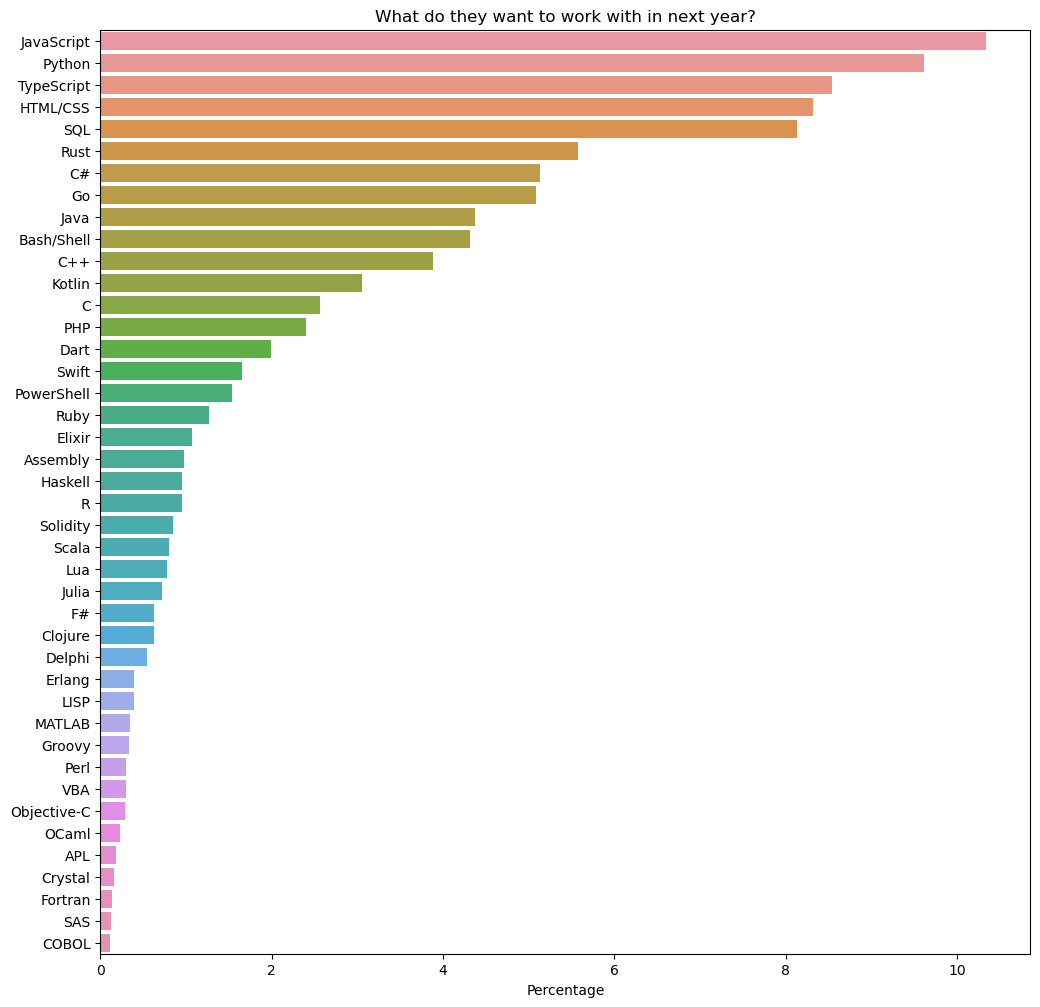

In [312]:
survey_df['LanguageWantToWorkWith']

survey_want = split_multicolumn(survey_df['LanguageWantToWorkWith']).sum().sort_values(ascending=False)
survey_want

survey_want_percentage = (survey_want / survey_want.sum()) * 100
survey_want_percentage

plt.figure(figsize=(12,12))
plt.title('What do they want to work with in next year?')
plt.xlabel('Percentage')
sns.barplot(x=survey_want_percentage, y=survey_want_percentage.index)
plt.show()

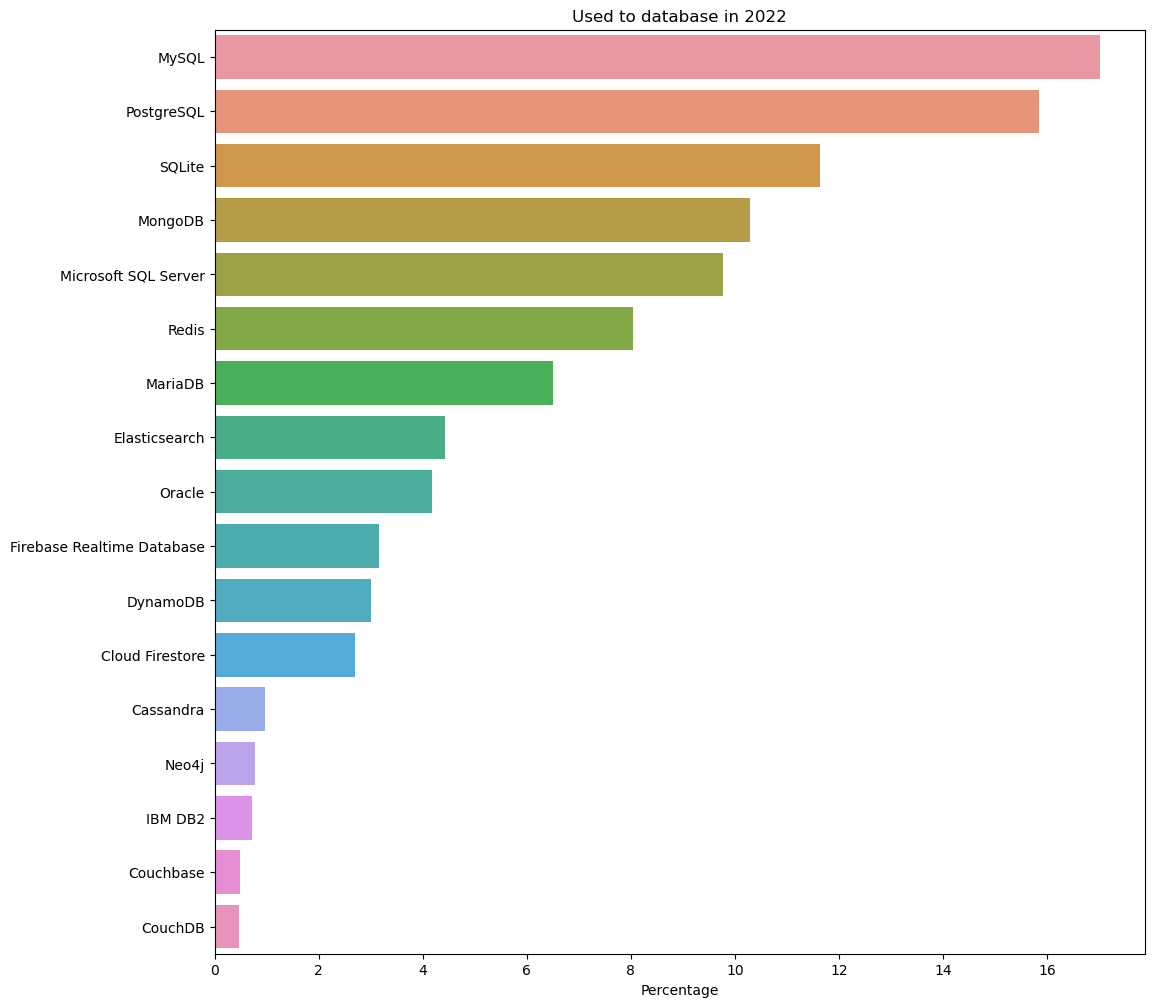

In [320]:
survey_raw['DatabaseHaveWorkedWith']

database_havework = split_multicolumn(survey_raw['DatabaseHaveWorkedWith'])
database_havework_totals = database_havework.sum().sort_values(ascending=False)
database_havework_totals

database_havework_percentage = (database_havework_totals / database_havework_totals.sum()) * 100

plt.figure(figsize=(12,12))
plt.title('Used to database in 2022')
plt.xlabel('Percentage')
sns.barplot(x=database_havework_percentage, y=database_havework_percentage.index)
plt.show()

## folium - 지도 기반의 시각화

    1. folium이란
        - 파이썬의 라이브러리로 지도 데이터를 시작화하는데 쉽게 도와줌.
        - leaflet.js를 기반으로 만들어졌음.
        - 지도에 마커를 표현하거나 범ㅁ위를 나타내는 다양한 도형을 입력할 수 있음.
    

In [322]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [389]:
import folium

m = folium.Map(location= [37.4036, 126.7289], zoom_start=16)
folium.Marker(location=[37.4036, 126.7289])
m

In [383]:
# 플레이데이터 독산 위도, 경도
latitude, longitude = (37.468251, 126.886212)

m = folium.Map(location=[latitude, longitude],
               zoom_start=17,
               width=750,
               height=500
               )
folium.Marker([latitude, longitude],
              popup='플레이데이터',
              tooltip='플레이데이터').add_to(m)
m

In [393]:
survey_raw_df = survey_raw
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [394]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index,
                                   'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [396]:
country_counts_df.at[12, 'Country']
# Russian Federation의 값이 불일치하여 Russia로 변경
country_counts_df.at[12, 'Country'] = 'Russia'

In [408]:
m = folium.Map(location=[30,0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,         # json파일 <- 지도영역 설정
    data=country_counts_df,             
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],
    fill_color='YlGn',                  # 원하는 색 사용
    fill_opacity=0.7,                   #
    line_opacity=0.2,
    legend_name='Respondents',
).add_to(m)

folium.LayerControl().add_to(m)

m

In [409]:
m.save('Country.html')

In [414]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

In [ ]:
pip install wordcloud

In [418]:
from wordcloud import WordCloud

In [422]:
survey_raw_df
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [423]:
# DevType에 있는 모든 NaN값을 제거(데이터 갯수 : 73,268 -> 60,761)
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 60761, dtype: object

In [424]:
# 두 개 이상의 값을 선택할 수 있는 질문이므로 문자열 내에 단어를 공백으로 구분하는 단 하나의 문자열로 만듬.
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 60761, dtype: object

In [ ]:
# Series 내의 값을 단 하나의 문자열로 만들기 위해서 join()를 활용
words = ' '.join(temp_words)
words

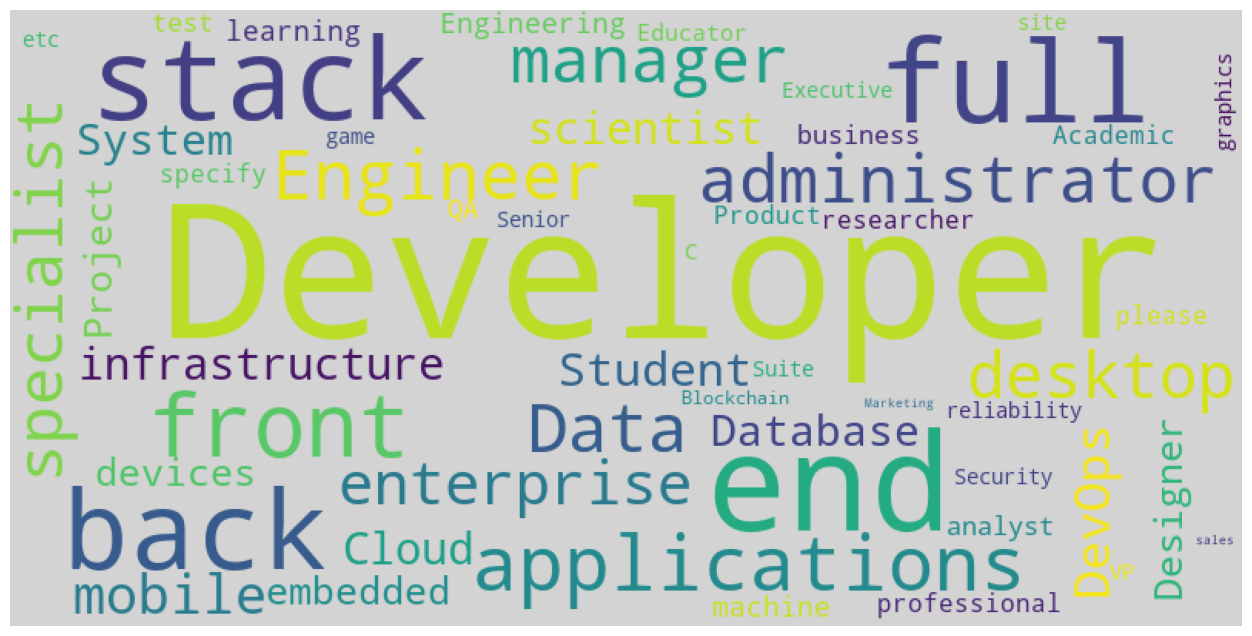

In [426]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path=['폰트 경로]
# max_font_size=60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400, 
               background_color='lightgrey').generate(words)

plt.figure(figsize=(16,8))

# x, y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [427]:
# word cloud 그림 저장하기
wc.to_file('DevType.png')